In [1]:
#Importing library functions
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
#Loading the dataset
X, y = load_iris(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
X.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [4]:
y.describe

<bound method NDFrame.describe of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32>

In [5]:
print("Range of input features : ")
[print(f"{column} : ({X[column].min()}, {X[column].max()})") for column in X.columns]

Range of input features : 
sepal length (cm) : (4.3, 7.9)
sepal width (cm) : (2.0, 4.4)
petal length (cm) : (1.0, 6.9)
petal width (cm) : (0.1, 2.5)


[None, None, None, None]

In [6]:
#No need of feature scaling as the values are not too far apart
#Train-Test-Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [7]:
print(y_test.value_counts())

target
1    10
2    10
0    10
Name: count, dtype: int64


In [8]:
model = DecisionTreeClassifier(max_depth=3, random_state=101)
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss']}

In [9]:
grid = GridSearchCV(model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    return_train_score=True,
                    cv=4,
                    n_jobs=-1,
                    verbose=1
                   )
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004930      0.001176         0.003728        0.001314   
1       0.003333      0.002071         0.000502        0.000869   
2       0.003390      0.000823         0.002861        0.001356   

  param_criterion                     params  split0_test_score  \
0            gini      {'criterion': 'gini'}           0.933333   
1         entropy   {'criterion': 'entropy'}           0.933333   
2        log_loss  {'criterion': 'log_loss'}           0.933333   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.966667           0.966667           0.866667         0.933333   
1           0.966667           0.966667           0.866667         0.933333   
2           0.966667           0.966667           0.866667         0.933333   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.040825                1            0.966667            0.955556   
1        0.040825                1            0.966667            0.955556   
2        0.040825                1            0.966667            0.955556   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.977778            0.988889          0.972222         0.012423  
1            0.977778            0.988889          0.972222         0.012423  
2            0.977778            0.988889          0.972222         0.012423

In [10]:
y_pred=grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [11]:
criterion = grid.best_params_
print(criterion)

{'criterion': 'gini'}


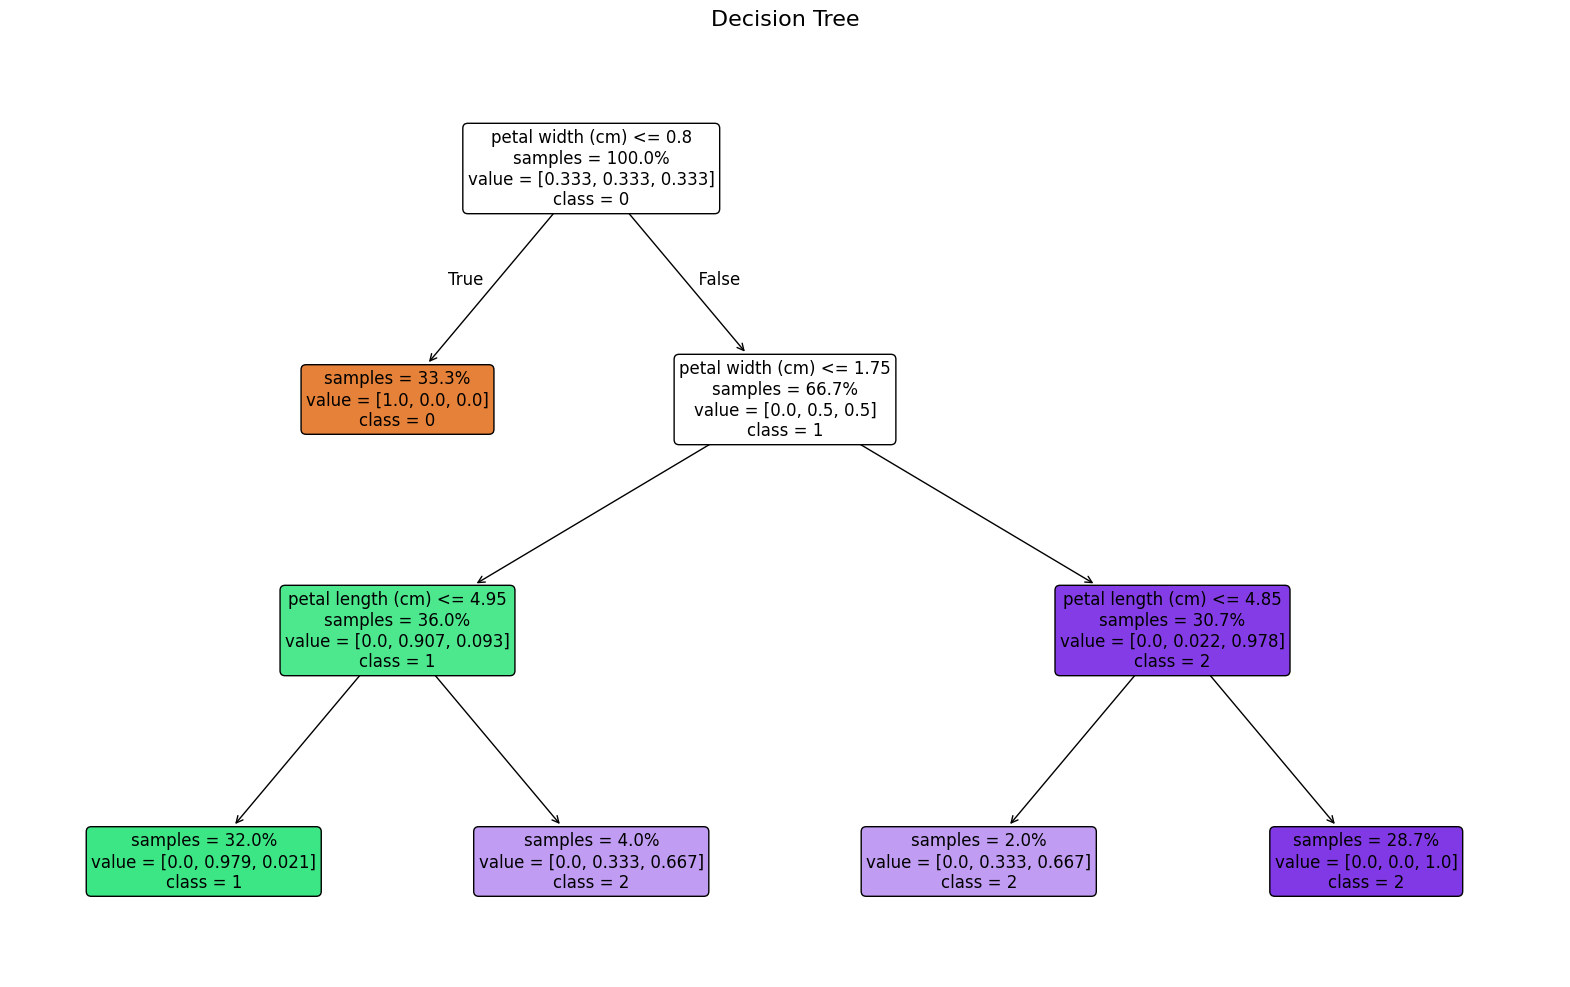

In [15]:
model.criterion = criterion['criterion']
model.fit(X, y)

import matplotlib.pyplot as plt

# 1. Set up a large figure so labels aren’t cramped
plt.figure(figsize=(20, 12))

# 2. Plot the tree
plot_tree(
    model,
    feature_names=X_train.columns,           # label the splits
    class_names=[str(c) for c in model.classes_],  # label the leaves
    filled=True,     # color nodes by majority class
    rounded=True,    # smooth box edges
    impurity=False,  # hide the gini/entropy numbers if you like
    proportion=True, # show percentages instead of counts
    fontsize=12      # tweak to taste
)

# 3. (Optional) Turn off the axis spines and ticks for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])

# 4. Add a title and display
plt.title("Decision Tree", fontsize=16, pad=20)
plt.savefig("decision_tree.png",    # filename (PNG by extension)
            dpi=300,                # resolution in dots-per-inch
)
plt.show()